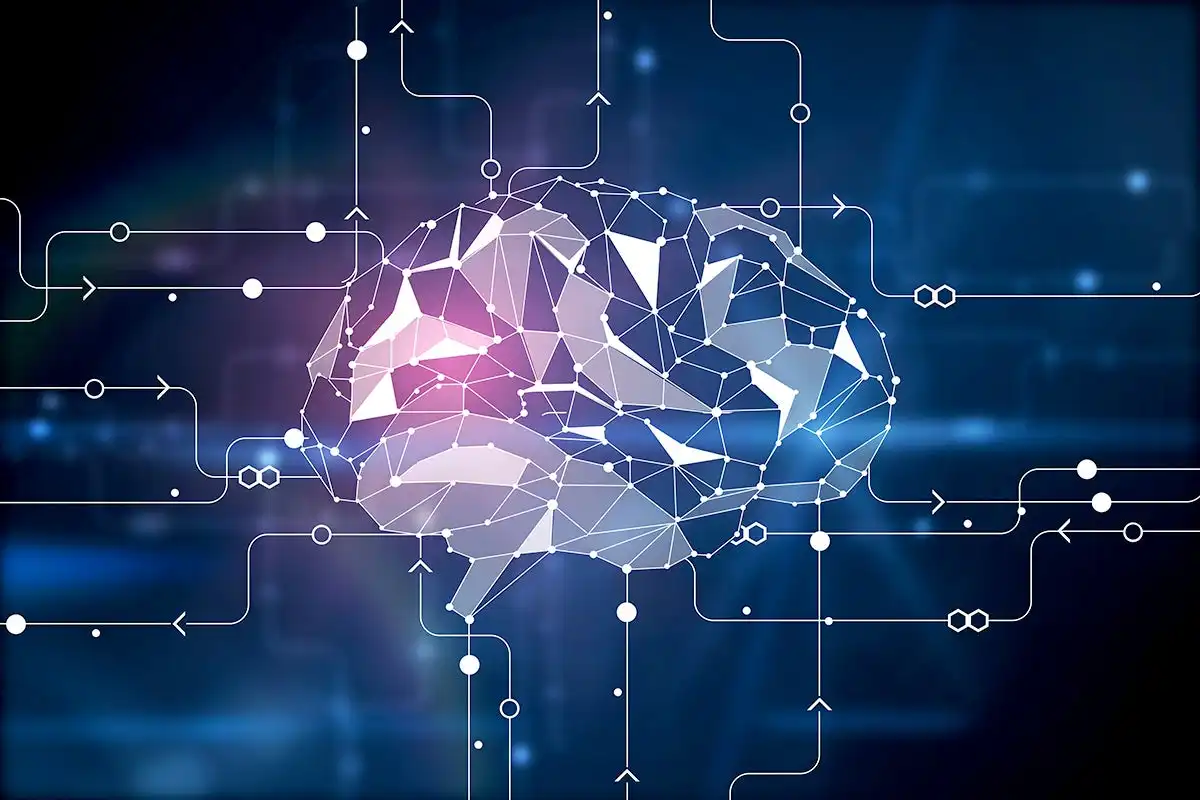

Stages of the project This project is divided into three stages, as modules:

**Module 1.Advanced Data Analytics**

**Module 2. Presentation and Visualization**

**Module 3.Big Data Storage and Processing**

References:

https://www.cio.com/article/189218/what-is-sentiment-analysis-using-nlp-and-ml-to-extract-meaning.html

https://www.linkedin.com/advice/0/what-some-best-practices-adapting-general-sentiment



# **Planning**

**Data Preprocessing**

- **Data Import:** Load the "ProjectTweets.csv" file into data analysis environment, such as Python (using libraries like Pandas) or R.

- **Data Exploration:** Familiarize with the dataset.

- **Data Cleaning:** Address missing data and data quality issues. This may include imputing missing values or removing irrelevant columns.

**Data Analysis**

- **Exploratory Data Analysis (EDA):** Conduct initial EDA to understand the distribution of data. Create summary statistics, visualizations, and identify any patterns or outliers.


**Sentiment Analysis**

- **Text Preprocessing:** The dataset includes tweet text, perform text preprocessing tasks such as lowercasing, removing stop words, punctuation, and special characters, and stemming/lemmatization.

- **labeling and Classification:** Using some basic Bag-of-words or count based techniques. and compared with pre-trained models for labeling the dataset and assign sentiment scores and then classify tweets based on topics or sentiments.

- **Sentiment Analysis:** Apply sentiment analysis techniques to gauge the sentiment of the Seeets. Common sentiment analysis tools or libraries include NLTK (Python) or Sentiment140.

- **Train models for Prediction:** Build and train machine learning models to predict trends on topics or sentiments in the next 1 week, 1 month, and 3 months. Libraries like scikit-learn are used for this purpose.

- **Time-Series Analysis:**The dataset includes a timestamp, analyze how tweet volume or sentiment changes over time. Consider using time-series analysis techniques or libraries like pandas and matplotlib.


**Data Visualization and Insights**

- **Data Visualization:** Create visualizations of the sentiments change, and the accuracy and usefulness of the different techniques to apply sentiment scores, train the models and get some key insights or trends in the dataset.

- **Sentiment Visualization:** Create visualizations, such as sentiment distribution histograms or sentiment over time plots, to understand the overall sentiment trends in the dataset.

- **Trending Topics:** Analyze the most frequently mentioned topics or hashtags in the dataset. Visualize their popularity over time.


**Reporting and Documentation**

- **Results Summary:** Write a concise summary of the insights and findings from your analysis.

- **Methodology:** Document the data preprocessing steps, tools, and techniques used for analysis.

- **Visualizations:** Include visualizations that highlight key findings in the report

- **Conclusion and Recommendations:** Conclude your analysis and provide any recommendations based on your findings.

- **References:** If you used specific libraries, algorithms, or papers, cite them properly.

- **Appendix:**Include code snippets, scripts, or any additional information that supports your analysis.

## **Research Questions**

1.What are the prevailing sentiment trends in tweets related to a specific topic or event on Twitter, and how have these sentiments evolved over time?

2.Can we identify the most influential users in the dataset by analyzing their tweet engagement metrics and what factors contribute to their influence?

3.Are there distinct patterns or clusters of topics in the Twitter dataset, and can we determine the factors that lead to the emergence of these patterns?

4.What are the prevailing sentiment trends in the tweets in the dataset, and how have these sentiments evolved over time?

# **Read and Load the Dataset**

In this step, few dataframe methods are used to look into the data and its features.

Printing Type of data to identify problem.

Printing the data types to confirm if there problems in data.

## Import Libraries

In [ ]:
# Install Libraries in the environment
!pip install pandas
!pip install numpy
#!pip install numpy pandas (it is the same)
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize Wordclouds
from wordcloud import WordCloud

In [ ]:
# Work with Dates and Time
from datetime import datetime
import pytz

# Work with text using regular expressions
import re
import string

In [ ]:
# Work with Files in the OS Folders
import os

# List the documents and folders in the URL indicated
for dirname, _, filenames in os.walk('/content/.config/ProjectTweets.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
# Import Google drive to the notebook machine
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Importing dataset and examining it
# Read in the data

#Uncomment the proper adress to the file:
#URL = '/content/ProjectTweets.csv'
#URL = '/content/.config/ProjectTweets.csv'
URL = '/content/drive/MyDrive/Colab Notebooks/Twitter Analysis/ProjectTweets.csv'

DATASET_COLUMNS=['ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"   # encoding is by default utf-8. if it doesnt work, then try encoding="latin-1"\

data = pd.read_csv(URL, encoding=DATASET_ENCODING, names=DATASET_COLUMNS) #, header=None)
data.sample(5)

,ids,date,flag,user,text
1004435,1880413185,Fri May 22 01:09:07 PDT 2009,NO_QUERY,VioletFiori,"@asiadevinyl hahaha, sorry, sweetheart, couldn..."
684535,2250545591,Sat Jun 20 00:48:50 PDT 2009,NO_QUERY,thedogsbollock,"@Limpar33 2 people who did likewise, restored ..."
1311991,2013550067,Tue Jun 02 22:57:20 PDT 2009,NO_QUERY,GirlBug,That's not to say I don't appreciate my free Q...
1073327,1966765826,Fri May 29 18:21:36 PDT 2009,NO_QUERY,darsky,@jango_taurus thats pretty rad haha. just look...
745142,2282175120,Mon Jun 22 11:02:08 PDT 2009,NO_QUERY,Bowl_the_Bunny,@scifimlb I don't think they have a shipper na...


In [ ]:
# Import the dataset without column names:
#data = pd.read_csv(URL, header=None)

# Rename the columns
#data.columns= ['Index','ids','date','flag','user','text']
data.head()

,ids,date,flag,user,text
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## **Familiarizing with the data:**

In this step, few dataframe methods are used to look into the data and its features.

Printing Type of data to identify problems.

Printing the data types to confirm if there problems in data.

In [ ]:
# To display the botton 5 rows
data.tail(5)

,ids,date,flag,user,text
1599995,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


Columns/features in data

In [ ]:
#Listing the features of the dataset
data.columns

Index(['ids', 'date', 'flag', 'user', 'text'], dtype='object')

Shape of data

In [ ]:
data. shape

(1600000, 5)

Length of the dataset

In [ ]:
print('length of data is', len(data))

length of data is 1600000


In [ ]:
# Used to count the number of rows
data.count()

ids     1600000
date    1600000
flag    1600000
user    1600000
text    1600000
dtype: int64

Rows and columns in the dataset

In [ ]:
print('Count of columns in the data is:  ', len(data.columns))
print('Count of rows in the data is:  ', len(data))

Count of columns in the data is:   5
Count of rows in the data is:   1600000


Data information

In [ ]:
# Checking rows and columns format
data.info()
# everything looks fine so far, no encoding errors, no special characters.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   ids     1600000 non-null  int64 
 1   date    1600000 non-null  object
 2   flag    1600000 non-null  object
 3   user    1600000 non-null  object
 4   text    1600000 non-null  object
dtypes: int64(1), object(4)
memory usage: 73.2+ MB


Datatypes of all columns

In [ ]:
# Print data types of DataFrame
data.dtypes

ids      int64
date    object
flag    object
user    object
text    object
dtype: object

## Handling Missing or Null values

Checking for null values

In [ ]:
np.sum(data.isnull().any(axis=1))

0

In [ ]:
print("Are there any missing values in the dataset ?", data.isnull().values.any())

Are there any missing values in the dataset ? False


In [ ]:
# Where are the missing or null values?
# sum of missing values: by default axis = 0
data.isnull().sum()

ids     0
date    0
flag    0
user    0
text    0
dtype: int64

In [ ]:
# check missing values
data.isnull()
# Yes, the missing data is the Flags

,ids,date,flag,user,text
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1599995,False,False,False,False,False
1599996,False,False,False,False,False
1599997,False,False,False,False,False
1599998,False,False,False,False,False


In [ ]:
# using notnull()
data.notnull()

,ids,date,flag,user,text
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
1599995,True,True,True,True,True
1599996,True,True,True,True,True
1599997,True,True,True,True,True
1599998,True,True,True,True,True


In [ ]:
# drop missing: drop row contains missing values
# it is inplace = False
data.dropna(how='any').shape

(1600000, 5)

In [ ]:
# Calculate how the dataframe would change if dropping the missing values
print("Shape: \n", data.dropna().shape, "\n")
print("Count of values: \n", data.dropna().count(), "\n")
print("Missing values: \n", data.dropna().isnull().sum())

Shape: 
 (1600000, 5) 

Count of values: 
 ids     1600000
date    1600000
flag    1600000
user    1600000
text    1600000
dtype: int64 

Missing values: 
 ids     0
date    0
flag    0
user    0
text    0
dtype: int64


##Relevance: Dropping Irrelevant Columns and Duplicated Rows

Check unique ids values

In [ ]:
len(data['ids'].unique())

1598315

Check the number of ids values

In [ ]:
data['ids'].nunique()

1598315

Dropping Duplicated Rows

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1685, 5)


In [ ]:
duplicate_rows_data.head()

,ids,date,flag,user,text
800261,1467863684,Mon Apr 06 22:33:35 PDT 2009,NO_QUERY,DjGundam,Awwh babs... you look so sad underneith that s...
800300,1467880442,Mon Apr 06 22:38:04 PDT 2009,NO_QUERY,iCalvin,Haven't tweeted nearly all day Posted my webs...
801280,1468053611,Mon Apr 06 23:28:09 PDT 2009,NO_QUERY,mariejamora,@hellobebe I also send some updates in plurk b...
801573,1468100580,Mon Apr 06 23:42:57 PDT 2009,NO_QUERY,cristygarza,good night swetdreamss to everyonee and jare...
801650,1468115720,Mon Apr 06 23:48:00 PDT 2009,NO_QUERY,WarholGirl,@ientje89 aw i'm fine too thanks! yeah i miss ...


In [ ]:
duplicate_rows_data.describe(include='object')

,date,flag,user,text
count,1685,1685,1685,1685
unique,1676,1,1601,1678
top,Fri May 29 17:42:53 PDT 2009,NO_QUERY,Jeff_Hardyfan,&quot;@mileycyrus&quot;you are the best!!!! I ...
freq,2,1685,9,8


In [ ]:
# Who are the users with most tweets, and how many?
duplicate_rows_data.text.value_counts().head(20)

&quot;@mileycyrus&quot;you are the best!!!! I love you  can you give me your e-mail???I want to write with you but I cant                         8
Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot;  O-: I like the look of the new transformer movie     1
Was just smiled at by pretty young lady  however, she was probably showing kindness and pity to the aged and infirm                               1
Ah, finally home. Had a nice shower but now have to learn for History  Think I'll learn in front of the PC so it won't be that boring             1
@StephCyrus09 ohkay bye  i lov you to                                                                                                             1
@jtbritto doood... bishop was the last word  I'll start saving sum new ones fer yu guys                                                           1
Going hoomee!!  Have to finish my exam tho  Boo!!                                                               

In [ ]:
# Who are the users with most tweets, and how many?
duplicate_rows_data.user.value_counts().head(20)

Jeff_Hardyfan     9
_shannon1234      4
Kelliekk          4
Danishbrunette    4
mam1cutie         3
olivia_15         3
fjkeogh           3
donniesgirl01     3
gemeg             3
kasey79           3
pcp071098         3
twibirdy          3
mckyliecooper     2
mrcelebrity       2
NatalieGolding    2
KimmiMcfly        2
ilanacharnelle    2
Roebaggs          2
Bubbles_Fly       2
AlleX91           2
Name: user, dtype: int64

In [ ]:
data = data.drop_duplicates()
data.shape

(1598315, 5)

## Format and Feature engineering

We need to process the date-time column in order to have numeric data more appropiate for analysis



In [ ]:
# Convert the text-based datetime into a Pandas datetime object
# We use the pd.to_datetime function to convert the text-based datetime into a Pandas datetime object.
# The format parameter is set to match the format of the input date string.
data['datetime'] = pd.to_datetime(data['date'], format="%a %b %d %H:%M:%S PDT %Y")

# Extract various datetime components
# We extract various datetime components using Pandas datetime accessor
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day_of_month'] = data['datetime'].dt.day
data['hour_of_day'] = data['datetime'].dt.hour
data['minute_of_hour'] = data['datetime'].dt.minute
data['day_of_week'] = data['datetime'].dt.day_name()
data['day_of_year'] = data['datetime'].dt.dayofyear

# in order to have the week of the year, we need to convert
data['week_of_year'] = data['datetime'].dt.strftime('%U').astype(int)

In [ ]:
# Display the result
data.head()

,ids,date,flag,user,text,datetime,year,month,day_of_month,hour_of_day,minute_of_hour,day_of_week,week_of_year,timezone,day_of_year
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,2009,4,6,22,19,Monday,14,PDT,96
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,2009,4,6,22,19,Monday,14,PDT,96
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,2009,4,6,22,19,Monday,14,PDT,96
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,2009,4,6,22,19,Monday,14,PDT,96
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,2009,4,6,22,19,Monday,14,PDT,96


In [ ]:
# Extract the "PDT" part and check how many different timezones we have
# We use the .str accessor to treat the column as a string, and then we use slicing to extract the characters from the 8th to 6th positions from the end of each string.
data['timezone'] = data['date'].str[-8:-5]
data['timezone'].unique()

Dataset description

In [ ]:
# Have a statistical description of the dataset (only work with numerical values):
#data.describe_option

data.describe()

,ids,year,month,day_of_month,hour_of_day,minute_of_hour,week_of_year,day_of_year
count,1.598315e+06,1598315.0,1.598315e+06,1.598315e+06,1.598315e+06,1.598315e+06,1.598315e+06,1.598315e+06
mean,1.998872e+09,2009.0,5.514845e+00,1.481395e+01,1.096208e+01,2.954145e+01,2.157393e+01,1.508367e+02
std,1.935913e+08,0.0,6.122012e-01,9.789759e+00,7.216102e+00,1.735578e+01,2.436918e+00,1.709716e+01
min,1.467810e+09,2009.0,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,9.600000e+01
25%,1.956927e+09,2009.0,5.000000e+00,6.000000e+00,5.000000e+00,1.400000e+01,2.100000e+01,1.480000e+02
50%,2.002114e+09,2009.0,6.000000e+00,1.600000e+01,1.000000e+01,3.000000e+01,2.200000e+01,1.530000e+02
75%,2.177094e+09,2009.0,6.000000e+00,2.100000e+01,1.800000e+01,4.500000e+01,2.400000e+01,1.660000e+02
max,2.329206e+09,2009.0,6.000000e+00,3.100000e+01,2.300000e+01,5.900000e+01,2.500000e+01,1.760000e+02


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ids,1598315.0,1.998872e+09,1.935913e+08,1.467810e+09,1.956927e+09,2.002114e+09,2.177094e+09,2.329206e+09
year,1598315.0,2.009000e+03,0.000000e+00,2.009000e+03,2.009000e+03,2.009000e+03,2.009000e+03,2.009000e+03
month,1598315.0,5.514845e+00,6.122012e-01,4.000000e+00,5.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
day_of_month,1598315.0,1.481395e+01,9.789759e+00,1.000000e+00,6.000000e+00,1.600000e+01,2.100000e+01,3.100000e+01
hour_of_day,1598315.0,1.096208e+01,7.216102e+00,0.000000e+00,5.000000e+00,1.000000e+01,1.800000e+01,2.300000e+01
minute_of_hour,1598315.0,2.954145e+01,1.735578e+01,0.000000e+00,1.400000e+01,3.000000e+01,4.500000e+01,5.900000e+01
week_of_year,1598315.0,2.157393e+01,2.436918e+00,1.400000e+01,2.100000e+01,2.200000e+01,2.400000e+01,2.500000e+01
day_of_year,1598315.0,1.508367e+02,1.709716e+01,9.600000e+01,1.480000e+02,1.530000e+02,1.660000e+02,1.760000e+02


In [ ]:
data.describe(include='object')
# This part is very interesting and it requires some good comments about

,date,flag,user,text,day_of_week,timezone
count,1598315,1598315,1598315,1598315,1598315,1598315
unique,774363,1,659775,1581466,7,1
top,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry,Sunday,PDT
freq,20,1598315,549,210,344097,1598315


# **Exploratory Data Analysis**

In [ ]:
# I did this copy to preserve the integrity of the original dataset
df = data.copy()

In [ ]:
# Convert days of the week to an ordinal feature:
# Define the order of the days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert the text-based day of the week to ordinal values
df['day_of_week'] = df['day_of_week'].astype(pd.CategoricalDtype(categories=day_order, ordered=True))

# I can use .cat.codes to convert the ordered categories to numerical codes too

## **Data Visualization of target Variables**

We first group the data in your DataFrame by different time periods (month, day of the month, hour of the day, day of the week, and week of the year).

We then create subplots for each line plot to visualize the number of tweets for each time period.

The line plots display the number of tweets for each respective time period.

<Axes: >

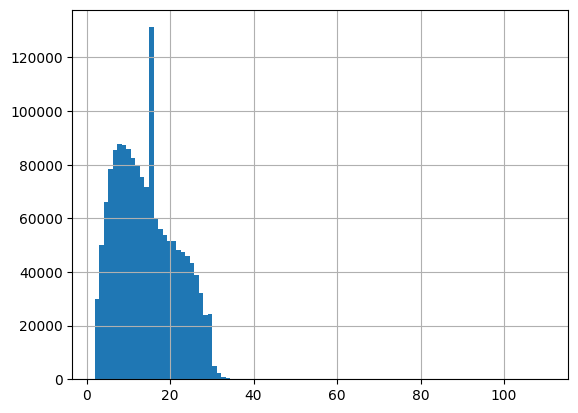

In [ ]:
# Getting the number of words by splitting them by a space
words_per_review = df.text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)

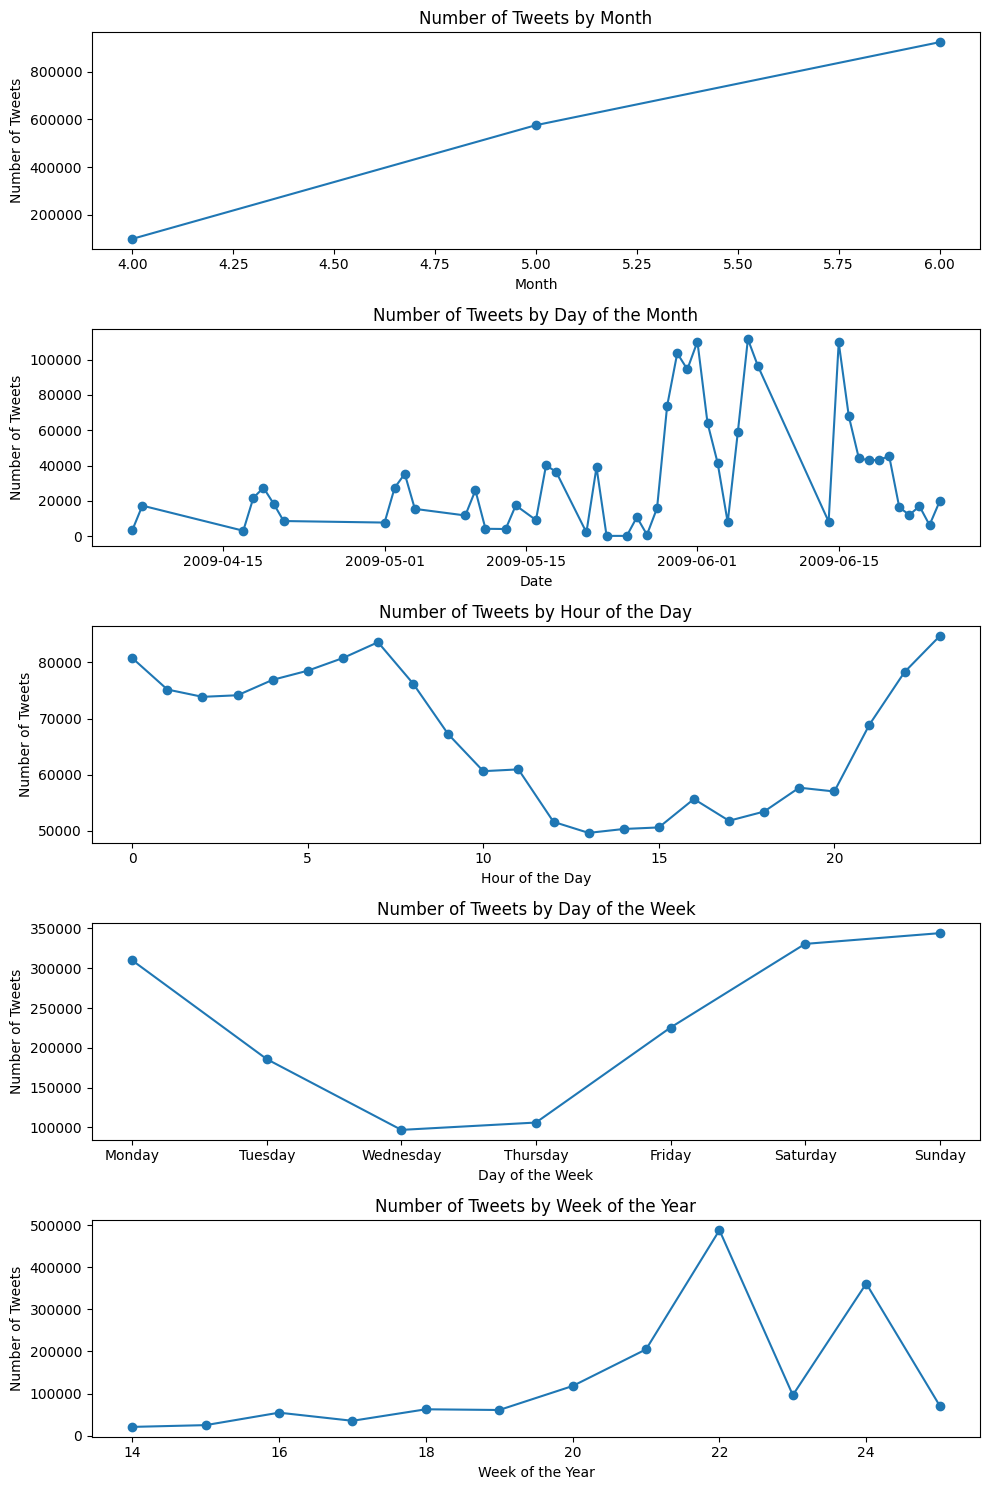

In [ ]:
# Group the data by different time periods
tweets_by_month = df.groupby('month').size()
tweets_by_date = df.groupby('day').size()
tweets_by_hour_of_day = df.groupby('hour_of_day').size()
tweets_by_day_of_week = df.groupby('day_of_week').size()
tweets_by_week_of_year = df.groupby('week_of_year').size()
tweets_by_day_of_year = df.groupby('day_of_year').size()

# Create a subplot with multiple line plots
fig, axes = plt.subplots(5, 1, figsize=(10, 15))

# Plot the number of tweets by month
axes[0].plot(tweets_by_month.index, tweets_by_month.values, marker='o', linestyle='-')
axes[0].set_title('Number of Tweets by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Tweets')

# Plot the number of tweets by day of the month
axes[1].plot(tweets_by_date.index, tweets_by_date.values, marker='o', linestyle='-')
axes[1].set_title('Number of Tweets by Day of the Month')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Tweets')

# Plot the number of tweets by hour of the day
axes[2].plot(tweets_by_hour_of_day.index, tweets_by_hour_of_day.values, marker='o', linestyle='-')
axes[2].set_title('Number of Tweets by Hour of the Day')
axes[2].set_xlabel('Hour of the Day')
axes[2].set_ylabel('Number of Tweets')

# Plot the number of tweets by day of the week
axes[3].plot(tweets_by_day_of_week.index, tweets_by_day_of_week.values, marker='o', linestyle='-')
axes[3].set_title('Number of Tweets by Day of the Week')
axes[3].set_xlabel('Day of the Week')
axes[3].set_ylabel('Number of Tweets')

# Plot the number of tweets by week of the year
axes[4].plot(tweets_by_week_of_year.index, tweets_by_week_of_year.values, marker='o', linestyle='-')
axes[4].set_title('Number of Tweets by Week of the Year')
axes[4].set_xlabel('Week of the Year')
axes[4].set_ylabel('Number of Tweets')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()

## Identifying most common tweets

In [ ]:
# Which are the most common tweets, and how many?
df.text.value_counts().head(20)

isPlayer Has Died! Sorry                                                                                   210
good morning                                                                                               118
headache                                                                                                   115
Good morning                                                                                               112
Headache                                                                                                   106
Not to worry, noone got that one. Next question starts in 1 minute, get your thinking caps on               86
 cant afford to see Angels and Demons, so i watched it for free: http://tr.im/lvBu                          86
Goodnight                                                                                                   85
my tummy hurts                                                                                              81
J

## Identifying most prolific twitters

In [ ]:
# How many unique users have tweeted in this set?
len(df.user.unique())

659775

In [ ]:
# Who are the users with most tweets, and how many?
# We use the value_counts() function to count the frequency of each user in the 'user' column.
user_counts = df.user.value_counts().head(20)
user_counts

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
SongoftheOss       227
Jayme1988          225
keza34             219
ramdomthoughts     216
shanajaca          213
wowlew             212
nuttychris         211
TraceyHewins       211
thisgoeshere       207
Spidersamm         205
Name: user, dtype: int64

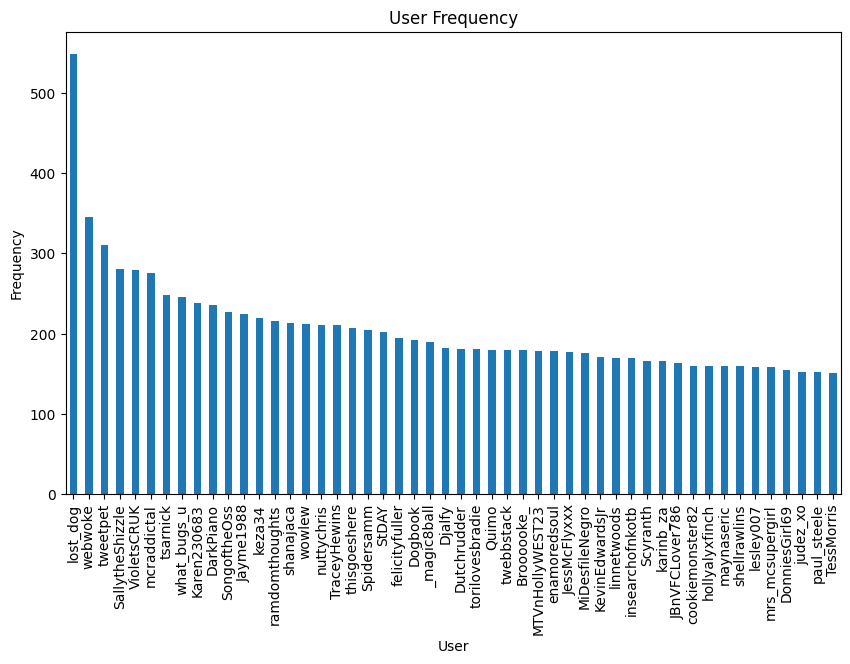

In [ ]:
# Create a bar chart
# We create a bar plot using Matplotlib with user names on the x-axis and tweet frequencies on the y-axis.
plt.figure(figsize=(10, 6))
user_counts.plot(kind='bar')
plt.title('User Frequency')
plt.xlabel('User')
plt.ylabel('Frequency')

# Show the bar chart
plt.show()

In [ ]:
# Group the data by a time period, e.g., day of the month
# We count the number of tweets per user and select the top 20 most frequent users.
# user_counts = df.user.value_counts().head(20)
# We filter the DataFrame to include only tweets from the top 20 users.
filtered_df =  df[df.user.isin(user_counts.index)]
# We group the data by date
grouped_df = filtered_df .groupby('day')['user']
# and count the number of tweets on each day.
user_frequency_over_time = grouped_df.value_counts()
# Pivot the table in order to fill null values (days when the user did not post) with zeros
user_frequency_over_time = user_frequency_over_time.unstack(fill_value=0)
user_frequency_over_time

user,DarkPiano,Jayme1988,Karen230683,SallytheShizzle,SongoftheOss,Spidersamm,TraceyHewins,VioletsCRUK,keza34,lost_dog,mcraddictal,nuttychris,ramdomthoughts,shanajaca,thisgoeshere,tsarnick,tweetpet,webwoke,what_bugs_u,wowlew
day,,,,,,,,,,,,,,,,,,,,
2009-04-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0
2009-04-07,1,2,4,0,0,0,6,3,0,0,0,0,13,5,0,15,0,0,0,0
2009-04-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0
2009-04-18,2,0,3,0,0,0,1,2,0,0,1,0,2,0,4,0,9,0,0,0
2009-04-19,6,2,1,0,0,0,5,4,5,0,0,35,9,0,4,9,22,0,0,0
2009-04-20,8,3,1,0,0,0,6,1,8,0,1,23,0,2,4,5,29,0,0,0
2009-04-21,2,0,1,0,0,0,0,7,2,0,1,0,0,0,0,2,65,0,0,0
2009-05-01,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,2,63,0,0,0
2009-05-02,5,1,5,0,1,2,6,4,12,7,0,26,0,0,5,12,115,0,0,0


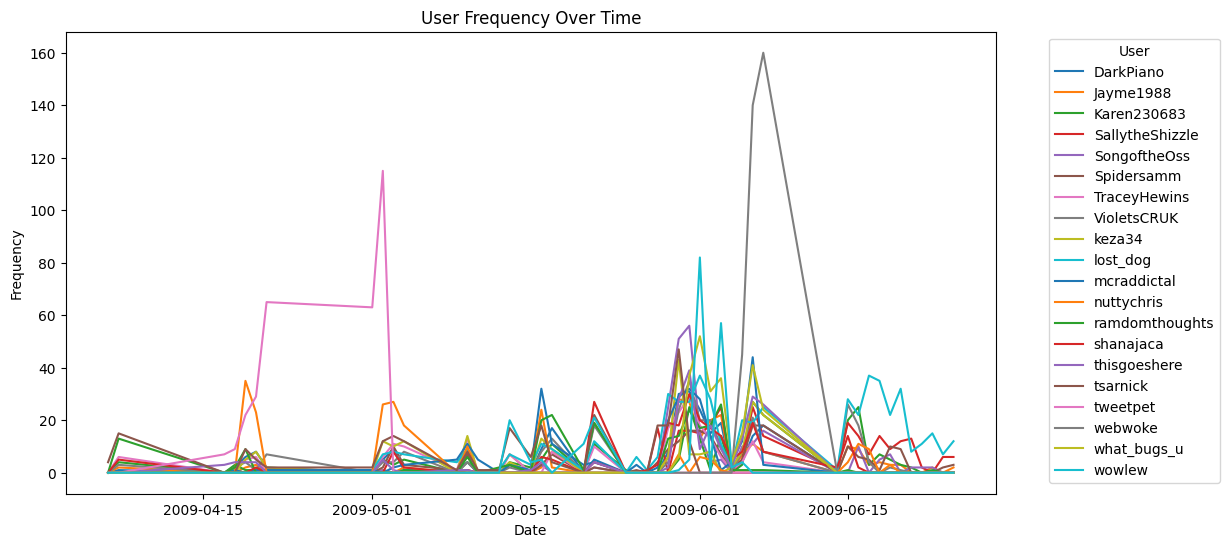

In [ ]:
# Create a line plot
user_frequency_over_time.plot(figsize=(12, 6))
plt.title('User Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='User', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the line plot
plt.show()

## Heatmap: Which hours of which days are more tweets generated?

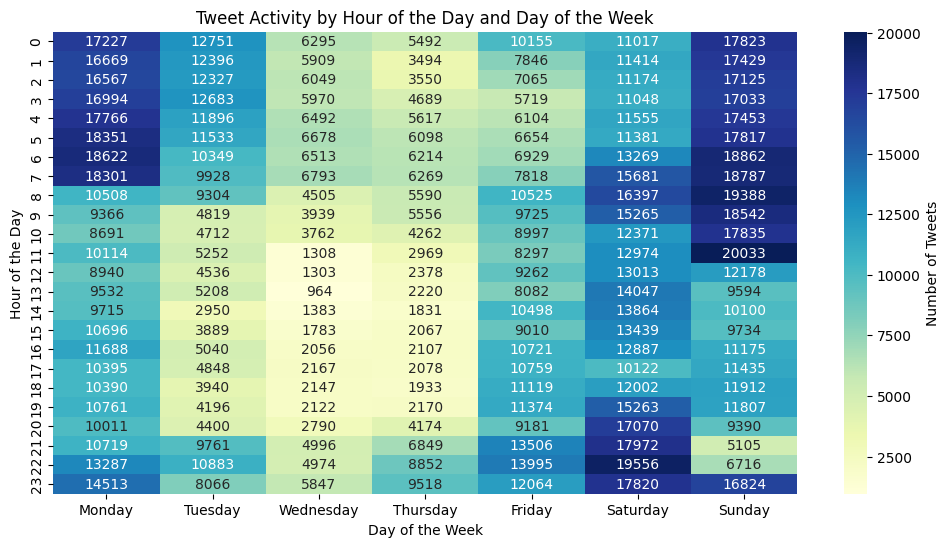

In [ ]:
# Group and count tweets by day of the week and hour of the day
tweet_activity = df.groupby(['hour_of_day','day_of_week']).size().unstack()

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tweet_activity, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Tweets'})
plt.title('Tweet Activity by Hour of the Day and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')

# Show the heatmap
plt.show()

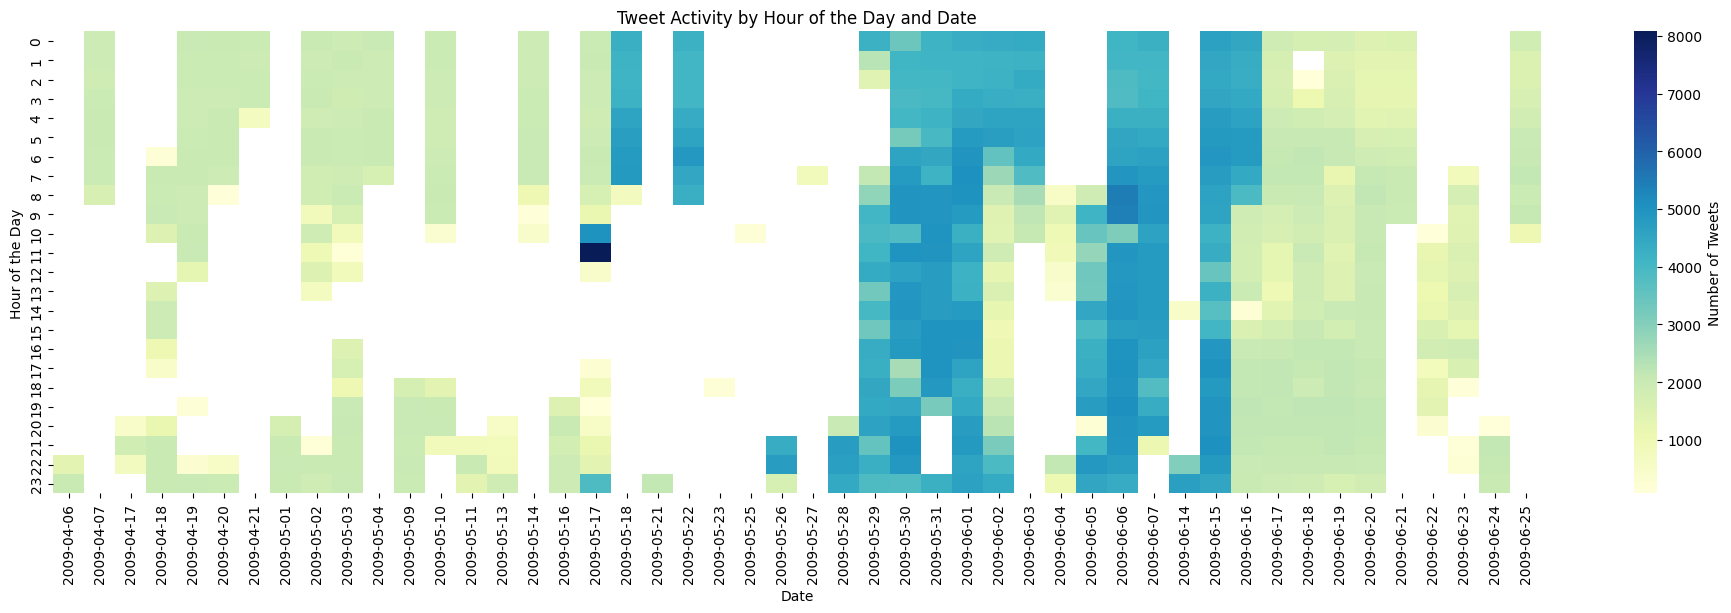

In [ ]:
# Group and count tweets by date and hour of the day
tweet_activity = df.groupby(['hour_of_day', 'day']).size().unstack()

# Create the heatmap
plt.figure(figsize=(24, 6))
sns.heatmap(tweet_activity, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Number of Tweets'})
plt.title('Tweet Activity by Hour of the Day and Date')
plt.xlabel('Date')
plt.ylabel('Hour of the Day')

# Show the heatmap
plt.show()

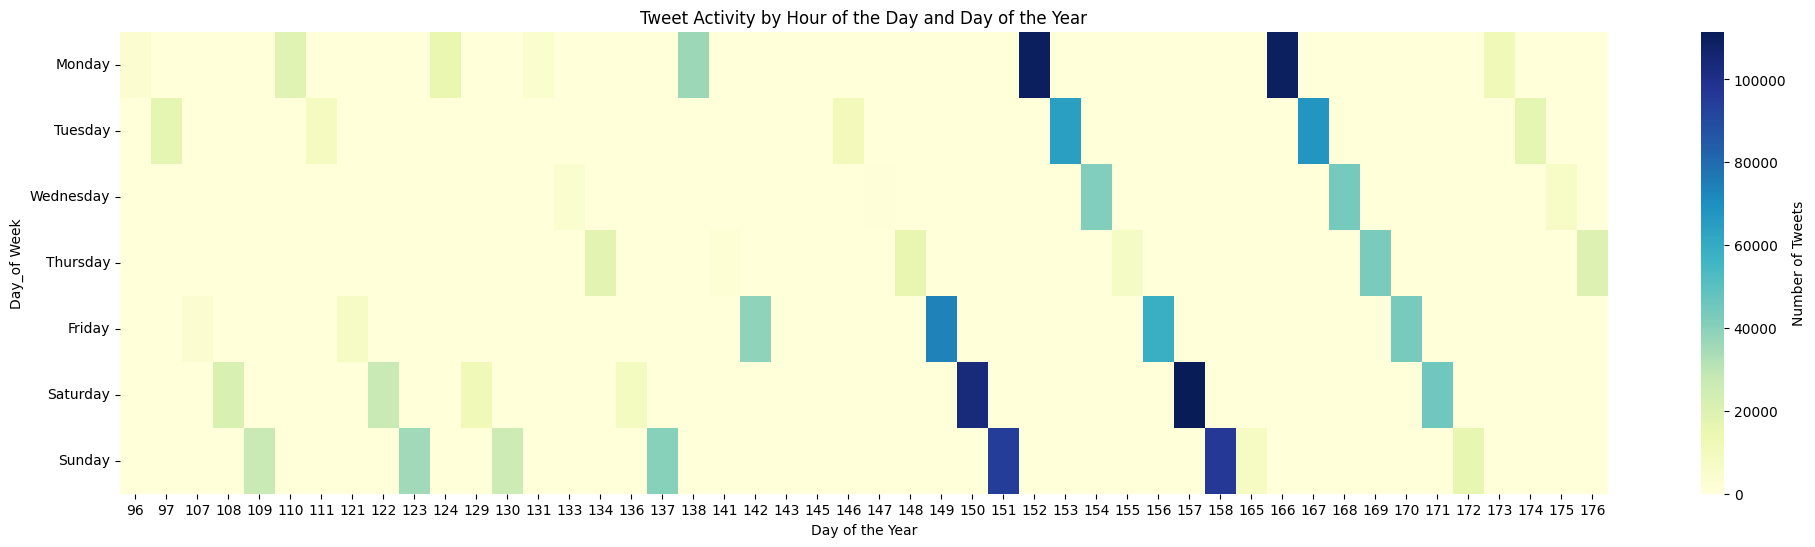

In [ ]:
# Group and count tweets by day of the year and hour of the day
tweet_activity = df.groupby(['day_of_week', 'day_of_year']).size().unstack()

# Create the heatmap
plt.figure(figsize=(24, 6))
sns.heatmap(tweet_activity, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Number of Tweets'})
plt.title('Tweet Activity by Hour of the Day and Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Day_of Week')

# Show the heatmap
plt.show()

## Word Clouds
Generate word clouds to visualize the most frequent words or hashtags used in the tweets.

total words collected:  740253


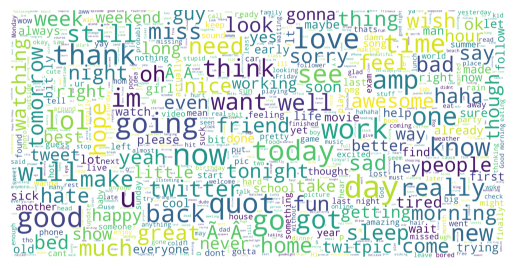

In [ ]:
# Take a random sample of 10000 tweets and join all its words in a single text
word_cloud_text = ''.join(df.sample(10000).text)
print("total words collected: ", len(word_cloud_text))

# Using the library Wordcloud
wordcloud = WordCloud(
    max_font_size=50,
    max_words=800,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save Clean Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1482516 to 615262
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ids             10000 non-null  int64         
 1   date            10000 non-null  object        
 2   flag            10000 non-null  object        
 3   user            10000 non-null  object        
 4   text            10000 non-null  object        
 5   datetime        10000 non-null  datetime64[ns]
 6   day             10000 non-null  object        
 7   year            10000 non-null  int64         
 8   month           10000 non-null  int64         
 9   day_of_month    10000 non-null  int64         
 10  hour_of_day     10000 non-null  int64         
 11  minute_of_hour  10000 non-null  int64         
 12  day_of_week     10000 non-null  category      
 13  day_of_year     10000 non-null  int64         
 14  week_of_year    10000 non-null  int64         


In [ ]:
%%time
df.to_csv('/content/drive/MyDrive/ProjectTweets (1).csv')

In [ ]:
# Read the saved file
df = pd.read_csv('/content/drive/MyDrive/ProjectTweets (1).csv')